<a href="https://colab.research.google.com/github/Tonry12/data_science_bootcamp_8_tonnaw/blob/main/Project2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [1]:
from IPython.lib.display import YouTubeVideo

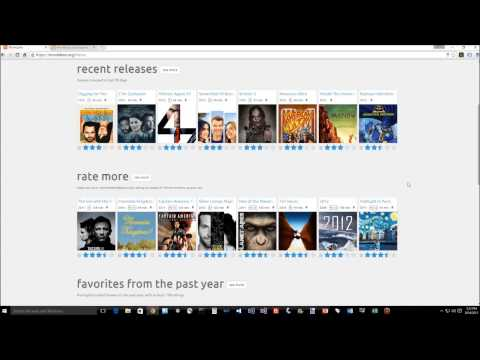

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. <name> <id>
2. <name> <id>
3. <name> <id>
4. <name> <id>
5. <name> <id>

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [3]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
# Create a HDF5



In [4]:
from google.colab import drive
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [145]:
import pandas as pd
ratings = pd.read_table("/content/drive/MyDrive/warehouse/project2/ratings.dat", sep="::", header=None, names=['UsersID' , 'MoviesID' , 'Rating' ,'View'])
movie = pd.read_table("/content/drive/MyDrive/warehouse/project2/movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'],encoding = "ISO-8859-1")
users = pd.read_table("/content/drive/MyDrive/warehouse/project2/users.dat", sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'])


Mounted at /content/drive


<ipython-input-145-1de0808ebb46>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table("/content/drive/MyDrive/warehouse/project2/ratings.dat", sep="::", header=None, names=['UserID' , 'MovieID' , 'Rating' ,'View'])
<ipython-input-145-1de0808ebb46>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie = pd.read_table("/content/drive/MyDrive/warehouse/project2/movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'],encoding = "ISO-8859-1")
<ipython-input-145-1de0808ebb46>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex

In [38]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
df = ratings.merge(movie, how="left", on='MovieID')
df_use =df.merge(users, how="left", on='UserID')
#-------------------------------
# Create a HDF5
ratings.to_hdf('data.h5', key='rating')
movie.to_hdf('data.h5', key='movie')
users.to_hdf('data.h5', key='user')
df_use.to_hdf('data.h5', key='data_use')
#pd.read_hdf('data.h5', key= 'data_use')


# Problem 3:
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

-
ทำ scatter plot แยกระหว่าง man กับ female และ mean rating สำหรับ movie ทุกเรื่อง
-ทำ scatter plot ระหว่าง man กับ female และ mean rating สำหรับ movie ที่มี rating > 200
-คำนวณค่า *correlation coefficent* ระหว่างการจัด rating ของ man และ female
 * คุณสังเกตอะไร?
 * เรตติ้งใกล้เคียงกันหรือเปล่า? สนับสนุนคำตอบของคุณด้วยข้อมูล!
- การคาดเดาภายใต้สถานการณ์ใดที่การจัดอันดับที่กำหนดโดยเพศหนึ่งสามารถใช้เพื่อทำนายการจัดอันดับที่กำหนดโดยเพศอื่นได้
 * ตัวอย่างเช่น ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่ออายุน้อยกว่าหรือมากกว่านั้น?
 * อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนข้อมูลเหล่านั้น


In [76]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib


### A scatter plot of men versus women and their mean rating for every movie

In [81]:
df_use

,UserID,MovieID,Rating,View,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [82]:
#-------------------------------
data_M_and_F = df_use[['Title','Gender','Rating']]

data_Male = data_M_and_F[data_M_and_F['Gender']=='M']
data_Female = data_M_and_F[data_M_and_F['Gender']=='F']
data_Female



,Title,Gender,Rating
0,One Flew Over the Cuckoo's Nest (1975),F,5
1,James and the Giant Peach (1996),F,3
2,My Fair Lady (1964),F,3
3,Erin Brockovich (2000),F,4
4,"Bug's Life, A (1998)",F,5
...,...,...,...
999863,Victor/Victoria (1982),F,4
999864,"Great Race, The (1965)",F,3
999865,Dial M for Murder (1954),F,4
999866,Dirty Dancing (1987),F,4


<ipython-input-93-4723bc7524fa>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m_mean = df_m.groupby('Title').mean()
<ipython-input-93-4723bc7524fa>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_f_mean = df_f.groupby('Title').mean()
<ipython-input-93-4723bc7524fa>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


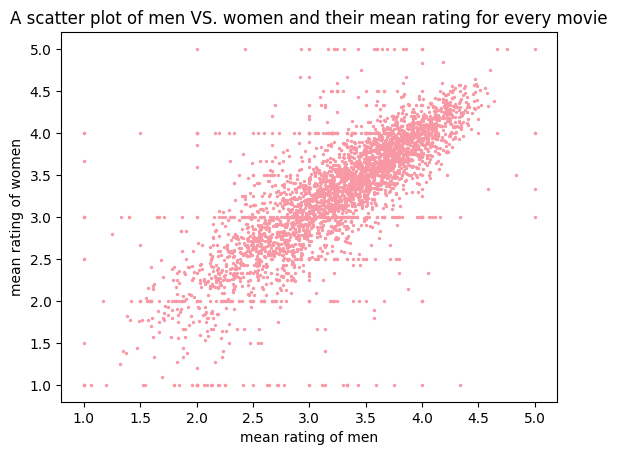

In [93]:
#-------------------------------
df_mf = df_use[['Title','Gender','Rating']]

df_m =df_mf[df_mf['Gender']=='M']
df_f = df_mf[df_mf['Gender']=='F']

df_m_mean = df_m.groupby('Title').mean()
df_f_mean = df_f.groupby('Title').mean()

data_plot = df_m_mean.merge(df_f_mean,how='left',on='Title')
data_plot_notnull = data_plot.dropna()


plt.scatter(
            data_plot_notnull['Rating_x'],
            data_plot_notnull['Rating_y'],
            s=2,
            c='#F898A4',
            cmap="jet"
            )
plt.title('A scatter plot of men VS. women and their mean rating for every movie')
plt.xlabel('mean rating of men')
plt.ylabel('mean rating of women')
plt.show()
#-------------------------------



### A scatter plot of men versus women and their mean rating for movies rated more than 200 times

<ipython-input-127-194b988787db>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m_mean = df_m.groupby('Title').mean()
<ipython-input-127-194b988787db>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_f_mean = df_f.groupby('Title').mean()
<ipython-input-127-194b988787db>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


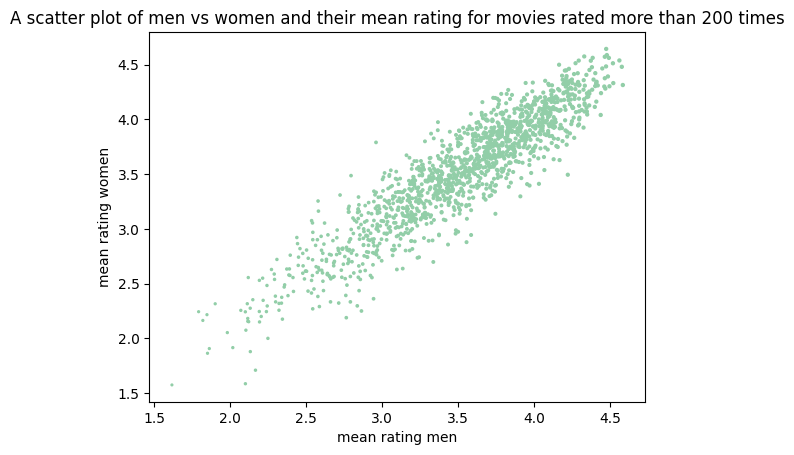

In [127]:
df_mf_sort = df_mf.groupby('Title').count().sort_values(by='Rating',ascending = False).reset_index()

df_m =df_mf[df_mf['Gender']=='M']
df_f = df_mf[df_mf['Gender']=='F']

df_m_mean = df_m.groupby('Title').mean()
df_f_mean = df_f.groupby('Title').mean()
df_mf1 = df_mf_sort.merge(df_m_mean,how='left',on='Title')
df_mf2 = df_mf_sort.merge(df_f_mean,how='left',on='Title')

df_mf1_1 = df_mf1[df_mf1['Rating_x'] >= 200]
use_full_m = df_mf1_1[['Title','Rating_y']]
use_full_m = use_full_m.set_index('Title')

df_mf2_1 = df_mf2[df_mf2['Rating_x'] >= 200]
use_full_f = df_mf2_1[['Title','Rating_y']]
use_full_f = use_full_f.set_index('Title')

plt.scatter(
            use_full_m,
            use_full_f,
            s=use_full_m['Rating_y'],
            c='#92CEA8',
            cmap="jet"
            )
plt.title('A scatter plot of men vs women and their mean rating for movies rated more than 200 times')
plt.xlabel('mean rating men')
plt.ylabel('mean rating women')
plt.show()

### The correlation coefficent between the ratings of men and women

In [141]:
# The correlation mean rating for every movie
ar1 = np.corrcoef(data_plot_notnull['Rating_x'],data_plot_notnull['Rating_y'])
print(f'จะได้ว่า correlation mean rating ระหว่างเพศชายกับเพศหญิงคือ {ar1} ')

จะได้ว่า correlation mean rating ระหว่างเพศชายกับเพศหญิงคือ [[1.         0.76318989]
 [0.76318989 1.        ]] 


In [143]:
#-------------------------------
# The correlation movies rated more than 200 times
ar2 = np.corrcoef(use_full_m['Rating_y'],use_full_f['Rating_y'])
print(f'จะได้ว่า correlation mean rating ระหว่างเพศชายกับเพศหญิง ที่มากกว่า 200 คือ {ar2} ')

จะได้ว่า correlation mean rating ระหว่างเพศชายกับเพศหญิง ที่มากกว่า 200 คือ [[1.         0.91896272]
 [0.91896272 1.        ]] 


## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.

In [159]:
df_use

,UserID,MovieID,Rating,View,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


##ข้อ 1 Men and women are more similar when they are older, consider their rating over the same genres.

<ipython-input-215-975eee3a5e39>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-215-975eee3a5e39>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


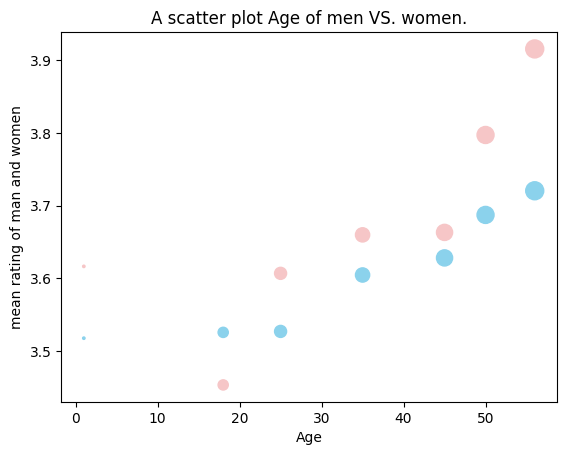

In [215]:
#Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.
df_mf = df_use[['Title','Gender','Age','Rating']]

df_m =df_mf[df_mf['Gender']=='M']
df_f = df_mf[df_mf['Gender']=='F']
am = df_m.groupby(['Age'])[['Rating']].mean().reindex()
af = df_f.groupby(['Age'])[['Rating']].mean().reindex()

s1 = pd.DataFrame({"Age": [1, 18, 25, 35,45,50,56]})
af1 = af.merge(s1,how='left',on='Age')
am1 = am.merge(s1,how='left',on='Age')

data_plot = am1.merge(af1,how='left',on='Age')
data_plot_notnull = data_plot.dropna()
plt.scatter(
            data_plot_notnull['Age'],
            data_plot_notnull['Rating_x'],
            s=data_plot_notnull['Age']*3,
            c='#8BD2EC',
            cmap="jet"
            )
plt.scatter(
            data_plot_notnull['Age'],
            data_plot_notnull['Rating_y'],
            s=data_plot_notnull['Age']*3,
            c='#F6C6C7',
            cmap="jet"
            )
plt.title('A scatter plot Age of men VS. women.')
plt.xlabel('Age')
plt.ylabel('mean rating of man and women')
plt.show()
#-------------------------------

In [221]:
# The correlation mean rating for age of man and woman
ar1 = np.corrcoef(data_plot_notnull['Rating_x'],data_plot_notnull['Rating_y'])
print(f'correlation mean rating ของอายุ ระหว่างเพศชายกับเพศหญิงคือ 0.90127597 ')
print('จะได้ว่าเพศชายและเพศหญิงเมื่อมีอายุใกล้เคียงกัน จะมีความสนใจในการให้เรทติ้งที่ใกล้เคียงกัน 90.12%')

correlation mean rating ของอายุ ระหว่างเพศชายกับเพศหญิงคือ 0.90127597 
จะได้ว่าเพศชายและเพศหญิงเมื่อมีอายุใกล้เคียงกัน จะมีความสนใจในการให้เรทติ้งที่ใกล้เคียงกัน 90.12%


In [153]:
#-------------------------------
#1: Men and women are more similar when they are older, consider their rating over the same genres.
df_3 = df_use[['Title','Gender','Occupation','Rating']]
df_3_sci = df_3[df_3['Occupation']==15]
df_3_pgm = df_3[df_3['Occupation']==12]
df_3_doc = df_3[df_3['Occupation']==6]
#-------------------------------
#scientist
df_3_sci_TR = df_3_sci[['Title','Gender','Rating']]
df_m_sci = df_3_sci_TR[df_mf['Gender']=='M']
df_f_sci = df_3_sci_TR[df_mf['Gender']=='F']
df_m_sci_mean = df_m_sci.groupby('Title').mean()
df_f_sci_mean = df_f_sci.groupby('Title').mean()
df_plot_sci = df_m_sci_mean.merge(df_f_sci_mean,how='left',on='Title')
df_plot_sci_notnull = df_plot_sci.dropna()


<ipython-input-153-557fbf1a6199>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_m_sci = df_3_sci_TR[df_mf['Gender']=='M']
<ipython-input-153-557fbf1a6199>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f_sci = df_3_sci_TR[df_mf['Gender']=='F']
<ipython-input-153-557fbf1a6199>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m_sci_mean = df_m_sci.groupby('Title').mean()
<ipython-input-153-557fbf1a6199>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_f_sci_mean = df_f_sci.groupby('Title').mean()


In [154]:
#programmer
df_3_pgm_TR = df_3_pgm[['Title','Gender','Rating']]
data_Male_programmer = df_3_pgm_TR[data_M_and_F['Gender']=='M']
data_Femal_programmer = df_3_pgm_TR[data_M_and_F['Gender']=='F']
data_Male_programmer_Mean = data_Male_programmer.groupby('Title').mean()
data_Female_programmer_Mean = data_Femal_programmer.groupby('Title').mean()
data_plot_programmer = data_Male_programmer_Mean.merge(data_Female_programmer_Mean,how='left',on='Title')
data_plot_programmer_nonna = data_plot_programmer.dropna()
plt.scatter(data_plot_programmer_nonna['Rating_x'], data_plot_programmer_nonna['Rating_y'])

<ipython-input-154-894c3c51370b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Male_programmer = df_3_pgm_TR[data_M_and_F['Gender']=='M']
<ipython-input-154-894c3c51370b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Femal_programmer = df_3_pgm_TR[data_M_and_F['Gender']=='F']
<ipython-input-154-894c3c51370b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Male_programmer_Mean = data_Male_programmer.groupby('Title').mean()
<ipython-input-154-894c3c51370b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Female_programm

In [156]:
#doctor
df_doc_TR = df_3_doc[['Title','Gender','Rating']]
data_Male_doctor = df_doc_TR[data_M_and_F['Gender']=='M']
data_Femal_doctor = df_doc_TR[data_M_and_F['Gender']=='F']
data_Male_doctor_Mean = data_Male_doctor.groupby('Title').mean()
data_Female_doctor_Mean = data_Femal_doctor.groupby('Title').mean()
data_plot_doctor = data_Male_doctor_Mean.merge(data_Female_doctor_Mean,how='left',on='Title')
data_plot_doctor_nonna = data_plot_doctor.dropna()

<ipython-input-156-448420161d5f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Male_doctor = df_doc_TR[data_M_and_F['Gender']=='M']
<ipython-input-156-448420161d5f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Femal_doctor = df_doc_TR[data_M_and_F['Gender']=='F']
<ipython-input-156-448420161d5f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Male_doctor_Mean = data_Male_doctor.groupby('Title').mean()
<ipython-input-156-448420161d5f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Female_doctor_Mean = data_Femal_doc

[[1.         0.47962135]
 [0.47962135 1.        ]]
[[1.         0.45008376]
 [0.45008376 1.        ]]
[[1.         0.51847883]
 [0.51847883 1.        ]]


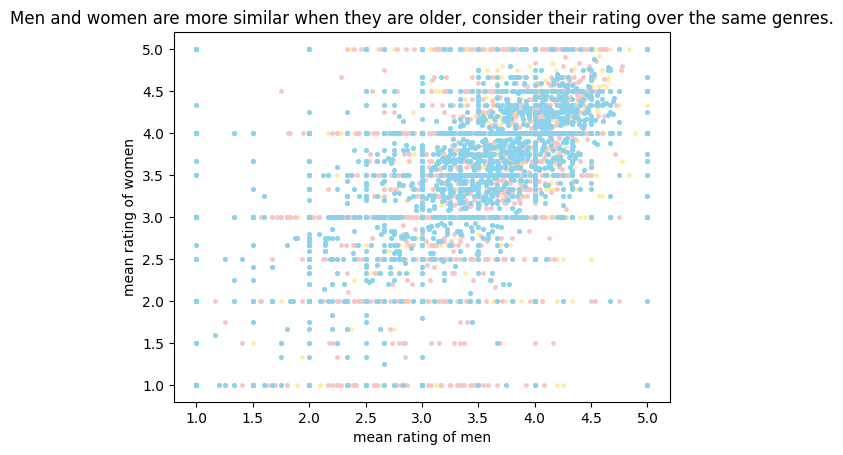

In [158]:
#scientist
print(np.corrcoef(df_plot_sci_notnull['Rating_x'],df_plot_sci_notnull['Rating_y']))
#programmer
print(np.corrcoef(data_plot_programmer_nonna['Rating_x'],data_plot_programmer_nonna['Rating_y']))
#doctor
print(np.corrcoef(data_plot_doctor_nonna['Rating_x'],data_plot_doctor_nonna['Rating_y']))

plt.scatter(df_plot_sci_notnull['Rating_x']
            , df_plot_sci_notnull['Rating_y']
            ,s=5
            ,c='#FCEE9E'
            )
plt.scatter(data_plot_programmer_nonna['Rating_x'],
            data_plot_programmer_nonna['Rating_y'],
            s=6,
            c='#F6C6C7'
            )
plt.scatter(data_plot_doctor_nonna['Rating_x'],
            data_plot_doctor_nonna['Rating_y'],
            s=7,
            c='#8BD2EC'
            )
plt.title('Men and women are more similar when they are older, consider their rating over the same genres.')
plt.xlabel('mean rating of men')
plt.ylabel('mean rating of women')
plt.show()

# Problem 4:
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

### For example, which movie to make/buy? (seperating via Genre?)

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**